In [188]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AAPL', 'GOOG', 'META','TSLA']

In [94]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [ ]:
appl_data = news_tables['AAPL']
appl_rows = appl_data.findAll('tr')

for index,row in enumerate(appl_rows):
    title = row.a.text
    timestamp = row.td.text

    print(timestamp+" "+title)


            Today 10:05AM
         Apple earnings preview: Here's what to expect

            10:00AM
         Qorvo price target raised to $90 from $80 at Loop Capital

            09:39AM
         Apples Flagging AI Hopes Get Revival From DeepSeeks Emergence

            09:20AM
         American Airlines collision, Big Tech earnings, Apple: 3 Things

            08:38AM
         What Makes Apple (AAPL) a Lucrative Investment?

            08:27AM
         How To Earn $500 A Month From Apple Stock Ahead Of Q1 Earnings

            08:11AM
         5 Things to Know Before the Stock Market Opens

            08:07AM
         These Stocks Are Moving the Most Today: Tesla, Microsoft, Meta, UPS, IBM, Nvidia, Comcast, Caterpillar, American, and More

            07:11AM
         Why Globalstar (GSAT) Crashed on Wednesday?

            06:09AM
         Samsung and Se Gyung Hi Tech's next-gen protective film & impact-resistant layer for Foldable Devices is aimed to Lure Apple

            0

In [137]:
from datetime import datetime

parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.strip().split(' ')  # Ensure proper splitting

        if len(date_data) == 1:  
            # If only time is present, assume today's date
            date = datetime.today().strftime('%Y-%m-%d')
            time = date_data[0]
        else:
            # Standard case: Date and Time present
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

# Create DataFrame
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

# Convert to datetime safely
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date

/tmp/ipykernel_1062/4152639945.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date


In [138]:
# Remove NaT values from the date column
df = df.dropna(subset=['date'])

In [139]:
df

,ticker,date,time,title
1,AAPL,2025-01-30,10:00AM,Qorvo price target raised to $90 from $80 at L...
2,AAPL,2025-01-30,09:39AM,Apples Flagging AI Hopes Get Revival From Deep...
3,AAPL,2025-01-30,09:20AM,"American Airlines collision, Big Tech earnings..."
4,AAPL,2025-01-30,08:38AM,What Makes Apple (AAPL) a Lucrative Investment?
5,AAPL,2025-01-30,08:27AM,How To Earn $500 A Month From Apple Stock Ahea...
...,...,...,...,...
395,TSLA,2025-01-28,11:38PM,"Jim Cramer on Tesla, Inc. (TSLA): I Want You T..."
396,TSLA,2025-01-30,10:14PM,Elon Musk gave the cold shoulder to Norways $1...
397,TSLA,2025-01-30,09:00PM,DeepSeeks Rise Exposes Nvidias Weakness
398,TSLA,2025-01-30,08:52PM,"Tesla, Inc. (TSLA): Piper Sandler Maintains $5..."


In [140]:
parsed_data

[['AAPL', 'Today', '10:05AM', "Apple earnings preview: Here's what to expect"],
 ['AAPL',
  '2025-01-30',
  '10:00AM',
  'Qorvo price target raised to $90 from $80 at Loop Capital'],
 ['AAPL',
  '2025-01-30',
  '09:39AM',
  'Apples Flagging AI Hopes Get Revival From DeepSeeks Emergence'],
 ['AAPL',
  '2025-01-30',
  '09:20AM',
  'American Airlines collision, Big Tech earnings, Apple: 3 Things'],
 ['AAPL',
  '2025-01-30',
  '08:38AM',
  'What Makes Apple (AAPL) a Lucrative Investment?'],
 ['AAPL',
  '2025-01-30',
  '08:27AM',
  'How To Earn $500 A Month From Apple Stock Ahead Of Q1 Earnings'],
 ['AAPL',
  '2025-01-30',
  '08:11AM',
  '5 Things to Know Before the Stock Market Opens'],
 ['AAPL',
  '2025-01-30',
  '08:07AM',
  'These Stocks Are Moving the Most Today: Tesla, Microsoft, Meta, UPS, IBM, Nvidia, Comcast, Caterpillar, American, and More'],
 ['AAPL',
  '2025-01-30',
  '07:11AM',
  'Why Globalstar (GSAT) Crashed on Wednesday?'],
 ['AAPL',
  '2025-01-30',
  '06:09AM',
  "Samsung a

In [141]:
s = len(parsed_data)
s

400

In [142]:
vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date

In [143]:
df

,ticker,date,time,title,compound
1,AAPL,2025-01-30,10:00AM,Qorvo price target raised to $90 from $80 at L...,0.0000
2,AAPL,2025-01-30,09:39AM,Apples Flagging AI Hopes Get Revival From Deep...,0.4215
3,AAPL,2025-01-30,09:20AM,"American Airlines collision, Big Tech earnings...",-0.3612
4,AAPL,2025-01-30,08:38AM,What Makes Apple (AAPL) a Lucrative Investment?,0.0000
5,AAPL,2025-01-30,08:27AM,How To Earn $500 A Month From Apple Stock Ahea...,0.0000
...,...,...,...,...,...
395,TSLA,2025-01-28,11:38PM,"Jim Cramer on Tesla, Inc. (TSLA): I Want You T...",0.0772
396,TSLA,2025-01-30,10:14PM,Elon Musk gave the cold shoulder to Norways $1...,-0.0516
397,TSLA,2025-01-30,09:00PM,DeepSeeks Rise Exposes Nvidias Weakness,-0.5106
398,TSLA,2025-01-30,08:52PM,"Tesla, Inc. (TSLA): Piper Sandler Maintains $5...",-0.5574


<Figure size 1000x800 with 0 Axes>

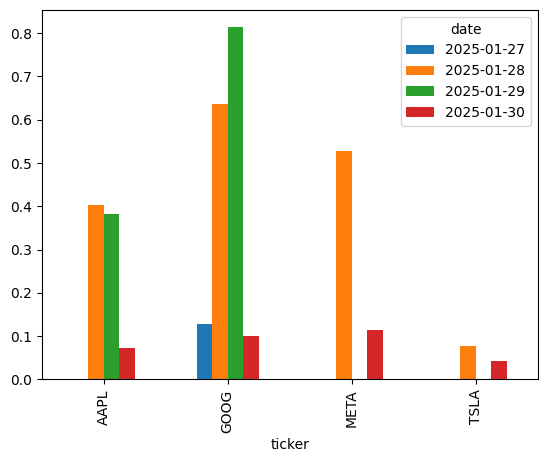

In [144]:
plt.figure(figsize=(10,8))

# Ensure 'compound' exists before grouping
if 'compound' in df.columns:
    mean_df = df.groupby(['ticker', 'date'])['compound'].mean().unstack()
    mean_df.plot(kind='bar')
    plt.show()
else:
    print("Error: 'compound' column not found in DataFrame.")

In [187]:
import yfinance as yf
masterdf = yf.download(tickers)['Close']
df_price = masterdf.pct_change().tail(4)
df_price

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,GOOG,META,TSLA
Date,,,,
2025-01-27 00:00:00+00:00,0.031780,-0.040267,0.019135,-0.023193
2025-01-28 00:00:00+00:00,0.036544,0.017031,0.021898,0.002367
2025-01-29 00:00:00+00:00,0.004617,0.000558,0.003203,-0.022583
2025-01-30 00:00:00+00:00,-0.003426,0.016876,0.025588,0.011398


In [186]:
mean_df

date,2025-01-27,2025-01-28,2025-01-29,2025-01-30
ticker,,,,
AAPL,0.000,0.4019,0.3818,0.072541
GOOG,0.128,0.6369,0.8126,0.100643
META,NaN,0.5267,0.0000,0.114981
TSLA,NaN,0.0772,0.0000,0.043414
